# HW7 (60 points)

This homework also requires the wine.data CSV, found where you downloaded this .ipynb file.

# Problem 1:  Recursion (6 points)

Write a *recursive* function that calculates $f(n)$ where $f(n) = f(n-1) + f(n-3) + 1$ and $f(1) = 1, f(2) = 2, f(3) = 3$.  You can assume $n$ is a positive integer.

In [30]:
# TODO f(n)

def f(n):
    if n == 1:
        return 1
    elif n == 2:
        return 2
    elif n == 3:
        return 3
    else:
        return f(n-1) + f(n-3) + 1

In [29]:
# Tests
print(f(4)) # Should print 5
print(f(5)) # Should print 8
print(f(6)) # Should print 12

5
8
12


# Problem 2:  Recursion on a Tree (14 points: 6,8)


a, 8 points) Write a recursive function sum_tree() that *recursively* sums all the values in a binary tree and returns this sum.  It should work with the BinaryTree definition that follows.  A left or right field of None means that there is no child there.

In [28]:
class BinaryTree():
  def __init__(self, left, right, value):
    self.left = left
    self.right = right
    self.value = value

sample_tree = BinaryTree(BinaryTree(BinaryTree(None,None,1),
                                    BinaryTree(None,None,2),
                                    3),
                         BinaryTree(BinaryTree(BinaryTree(None,None,4),
                                               BinaryTree(None,None,5),
                                               6),
                                    BinaryTree(None,None,7),
                                    8),
                         9)
sample_tree2 = BinaryTree(None, BinaryTree(None, BinaryTree(None, BinaryTree(None,None,1),2),3),4)

In [27]:
# TODO sum_tree()

def sum_tree(tree):
    if tree == None:
        return 0
    return tree.value + sum_tree(tree.left) + sum_tree(tree.right)

In [26]:
# Tests
print(sum_tree(sample_tree)) # Should be 45
print(sum_tree(sample_tree2)) # Should be 10

45
10


b, 8 pts) Write a function count_full_branches() that takes a binary tree and *recursively* counts the number of nodes that have both a left and right child.  Assume the tree argument was created using the provided binary tree class.  A missing child is signified by a left or right field that is None.  (The value field is not useful for this exercise.)

In [ ]:
# TODO count_full_branches()

def count_full_branches(tree):
    if tree is None:
        return 0
    if tree.left is None or tree.right is None:
        return 0
    return 1 + count_full_branches(tree.left) + count_full_branches(tree.right)

In [ ]:
print(count_full_branches(sample_tree)) # Expect 4
print(count_full_branches(sample_tree2)) # Expect 0

4
0


# Problem 3:  Nearest neighbors (18 points:  4,3,4,3,4)

In this problem, we'll train on a dataset where the labels are different varieties ("cultivars") of wine, and the features are different chemical measurements of the wine.

Upload the wine.data file.

In [ ]:
from google.colab import files

uploaded = files.upload() # Upload wine.data

Saving wine.data to wine.data


We next set up a dataframe to organize the data.

In [25]:
# wine.data:  see https://archive.ics.uci.edu/ml/datasets/Wine

import pandas as pd

col_names = ['Type','Alcohol','Malic acid','Ash','Alcalinity of ash',
             'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols',
             'Proanthocyanins','Color intensity','Hue','OD280/OD315','Proline']

df = pd.read_csv('wine.data', names =col_names)
df.head()

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


We then separate the data into features (X) and labels (y).

In [ ]:
y = df['Type']

In [ ]:
X = df.iloc[:,1:]

a, 4 pts) Explain what the next code box is doing, and why it is important to do it for a nearest neighbors classifier training on this data.

In [24]:
for col in range(13):
  X.iloc[:,col] = X.iloc[:,col] / X.iloc[:,col].max()

In [ ]:
X.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,0.959541,0.294828,0.752322,0.520000,0.783951,0.721649,0.602362,0.424242,0.639665,0.433846,0.608187,0.9800,0.633929
1,0.890088,0.306897,0.662539,0.373333,0.617284,0.682990,0.543307,0.393939,0.357542,0.336923,0.614035,0.8500,0.625000
2,0.887390,0.406897,0.826625,0.620000,0.623457,0.721649,0.637795,0.454545,0.784916,0.436923,0.602339,0.7925,0.705357
3,0.968982,0.336207,0.773994,0.560000,0.697531,0.992268,0.687008,0.363636,0.608939,0.600000,0.502924,0.8625,0.880952
4,0.892785,0.446552,0.888545,0.700000,0.728395,0.721649,0.529528,0.590909,0.508380,0.332308,0.608187,0.7325,0.437500


**TODO answer to (a)**

This code box is rescaling the dataset columns to the range

b, 3 pts) Now use scikit-learn's train_test_split() function to separate X and y into training and test sets.

In [ ]:
# TODO

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

c, 4 pts) Train a k-nearest neighbors classifier on the training data, where k is 3.

In [ ]:
# TODO

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

d, 3 pts) Use the score() method of the nearest neighbors classifier on the test data, to determine how well this classifier does on the withheld data.

In [ ]:
# TODO

print(knn.score(X_test, y_test))
print(knn.score(X_train, y_train))

0.9444444444444444
0.9859154929577465


e, 4pts) Evaluating with score() on the training data instead of the testing data should give 100% accuracy if k=1.  Why?

**TODO answer to (e)**

The KNN exhibits a high training score at K=1 because it has a tendency to closely follow the training data. Or, to put it another way, if k = 1, the item is simply put into the class of that one nearest neighbor. However, the test score is rather low in comparison, which suggests overfitting.

# Problem 4:  Decision trees (22 points:  8, 6, 4, 4)

a, 8 pts) Using the same train/test split as the previous problem, train a scikit-learn entropy-based decision tree classifier on the scaled data, and use score() to evaluate the classifier.  When creating the DecisionTreeClassifier, pass in the argument random_state=110 so that we can be sure its performance matches expectations.

In [ ]:
# TODO train and evaluate DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
atree = DecisionTreeClassifier(random_state=110)
atree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=110)

b, 6 pts) What does "overfitting" mean?  Call score() on the training data.  Is this performance consistent with the idea that the model is overfitting?

In [ ]:
# TODO call score()
atree.score(X_train, y_train)

1.0

**TODO overfitting explanation and whether model appears to be overfitting**

Overfitting refers to a model that models the training data too well. overfitting happens when a model learns the detail and noise in the training data. In simple terms, it means our model does not generalize well from the training data to the testing data.

Therefore, if we use the score() function to test the accuracy of the model when inputting the training data, it will appears as '1'.


c, 4 points) Experiment with setting the following parameters of the DecisionTreeClassifier constructor:  max_depth=3, min_samples_leaf=8.  Does the evidence from train and test performance suggest the model is overfitting now?  

In [31]:
# TODO evaluate a DecisionTreeClassifier with the given parameters

atree = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 8, random_state = 110)

atree.fit(X_train, y_train)

print(atree.score(X_train, y_train))
print(atree.score(X_test, y_test))

0.9295774647887324
0.8611111111111112


**TODO is there evidence of overfitting now?**

It does not seems that we have a overfitting ocuurs since we implement the 'random_state' instance in our decision treem the accuracy of the model when input the training data or the testing data fall to a normal level.

d, 4 points) Using tree.plot_tree(), draw the tree you made in part (c).  You don't need to name the types or features.

[Text(0.5416666666666666, 0.875, 'X[12] <= 0.449\ngini = 0.659\nsamples = 142\nvalue = [47, 56, 39]'),
 Text(0.3333333333333333, 0.625, 'X[9] <= 0.373\ngini = 0.483\nsamples = 88\nvalue = [1, 54, 33]'),
 Text(0.16666666666666666, 0.375, 'X[9] <= 0.309\ngini = 0.163\nsamples = 57\nvalue = [1, 52, 4]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.25, 0.125, 'gini = 0.58\nsamples = 10\nvalue = [1, 5, 4]'),
 Text(0.5, 0.375, 'X[12] <= 0.301\ngini = 0.121\nsamples = 31\nvalue = [0, 2, 29]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.375\nsamples = 8\nvalue = [0, 2, 6]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.0\nsamples = 23\nvalue = [0, 0, 23]'),
 Text(0.75, 0.625, 'X[6] <= 0.449\ngini = 0.261\nsamples = 54\nvalue = [46, 2, 6]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.406\nsamples = 8\nvalue = [1, 1, 6]'),
 Text(0.8333333333333334, 0.375, 'X[0] <= 0.889\ngini = 0.043\nsamples = 46\nvalue = [45, 1, 0]'),
 Text(0.75, 0.125, 'gini = 0.21

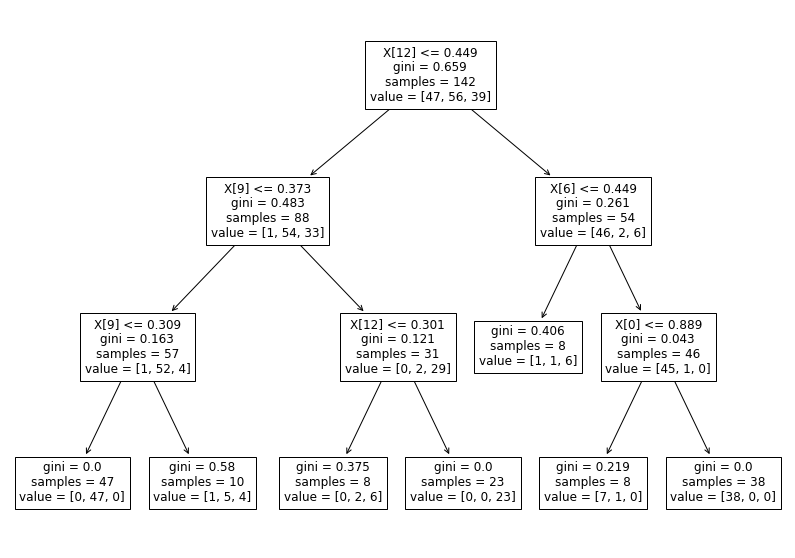

In [32]:
# TODO tree.plot_tree()

import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(14,10))
tree.plot_tree(atree)